In [18]:
import pandas as pd

In [19]:
data = pd.read_csv("2000-2021 제주도 일간 기후 데이터.xlsx_서귀포.csv",encoding="cp949")

In [20]:
data.columns

Index(['Date', 'Tem_mean', 'Tem_max', 'Tem_min', 'Wspeed_mean', 'Wspeed_max',
       'Wspeed_min', 'Humid_mean', 'Sunshine_mean', 'Solar_mean', 'Cloud_max',
       'Cloud_min', 'Season'],
      dtype='object')

In [21]:
data.head

<bound method NDFrame.head of             Date  Tem_mean  Tem_max  Tem_min  Wspeed_mean  Wspeed_max  \
0     2000-01-01      13.4     16.7     10.2          3.7         4.8   
1     2000-01-02      13.0     17.6      8.7          2.4         6.0   
2     2000-01-03      10.1     13.2      7.3          2.0         3.4   
3     2000-01-04      11.4     14.3      7.5          2.1         2.8   
4     2000-01-05      15.0     16.9     12.7          2.3         4.9   
...          ...       ...      ...      ...          ...         ...   
7970  2021-10-27      17.5     22.2     13.3          1.6         3.0   
7971  2021-10-28      17.3     21.0     13.8          1.7         2.9   
7972  2021-10-29      18.4     21.2     16.9          3.0         4.2   
7973  2021-10-30      17.7     20.7     14.9          1.9         2.9   
7974  2021-10-31      17.3     22.3     13.3          1.5         3.1   

      Wspeed_min  Humid_mean  Sunshine_mean  Solar_mean  Cloud_max  Cloud_min  \
0           

In [22]:
data['Date'] = pd.to_datetime(data['Date'])
data = data[(data['Date'].dt.year >= 2015)]

In [23]:
data.isnull().sum()

Date                0
Tem_mean            0
Tem_max             0
Tem_min             0
Wspeed_mean         0
Wspeed_max          0
Wspeed_min          0
Humid_mean          0
Sunshine_mean      16
Solar_mean       2496
Cloud_max        1194
Cloud_min        1194
Season              0
dtype: int64

In [24]:
from sklearn.impute import KNNImputer
import numpy as np

# 공백을 NaN으로 변환
data['Sunshine_mean'] = data['Sunshine_mean'].replace("", np.nan)

# DataFrame → 2차원 배열로 변환
sunshine = data[['Sunshine_mean']]

# KNN Imputer
imputer = KNNImputer(n_neighbors=5)
data[['Sunshine_mean']] = imputer.fit_transform(sunshine)

C:\Users\hansung\AppData\Local\Temp\ipykernel_1428\322816688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sunshine_mean'] = data['Sunshine_mean'].replace("", np.nan)
C:\Users\hansung\AppData\Local\Temp\ipykernel_1428\322816688.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Sunshine_mean']] = imputer.fit_transform(sunshine)


In [25]:
data = data.drop(columns=['Solar_mean','Cloud_max','Cloud_min'])

In [26]:
data['tem_diff'] = abs(data['Tem_max'] - 22.5)
data.head()

,Date,Tem_mean,Tem_max,Tem_min,Wspeed_mean,Wspeed_max,Wspeed_min,Humid_mean,Sunshine_mean,Season,tem_diff
5479,2015-01-01,2.4,3.9,0.3,3.1,4.2,2.1,66.2,5.4,Winter,18.6
5480,2015-01-02,5.2,8.2,3.2,3.1,5.2,1.2,55.7,3.2,Winter,14.3
5481,2015-01-03,7.2,11.4,3.7,1.7,3.5,0.8,69.8,3.6,Winter,11.1
5482,2015-01-04,11.8,16.0,8.7,2.2,5.2,0.3,60.9,1.2,Winter,6.5
5483,2015-01-05,12.6,16.2,7.8,2.2,6.9,0.6,69.0,3.7,Winter,6.3


c:\Users\hansung\.conda\envs\berta\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\hansung\.conda\envs\berta\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


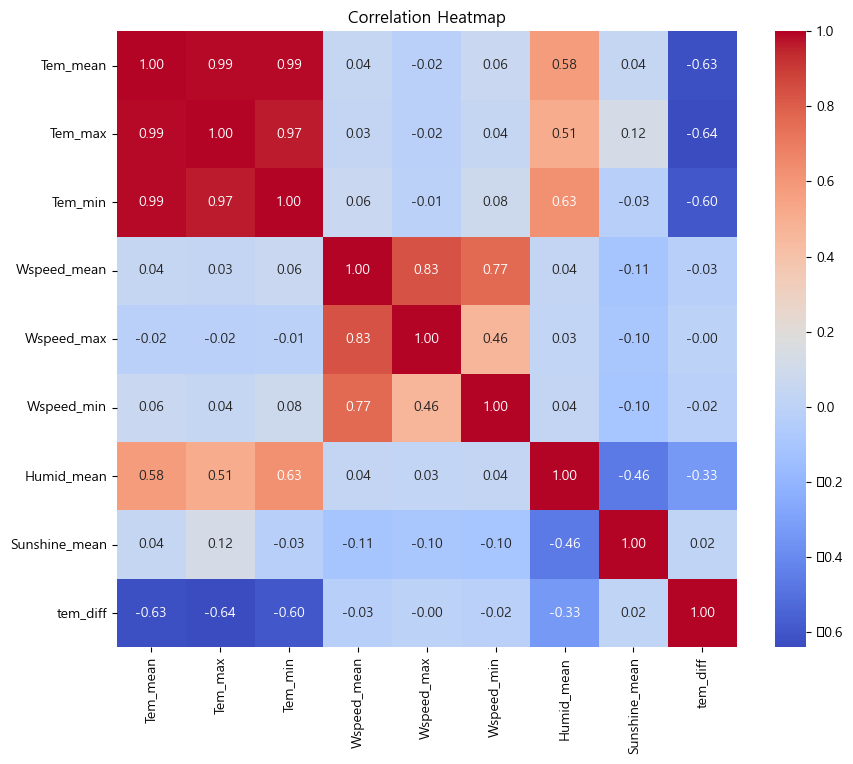

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 행렬 구하기 (수치형 변수만)
corr = data.corr(numeric_only=True)

# 히트맵 그리기
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [28]:
data.columns

Index(['Date', 'Tem_mean', 'Tem_max', 'Tem_min', 'Wspeed_mean', 'Wspeed_max',
       'Wspeed_min', 'Humid_mean', 'Sunshine_mean', 'Season', 'tem_diff'],
      dtype='object')

c:\Users\hansung\.conda\envs\berta\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\hansung\.conda\envs\berta\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


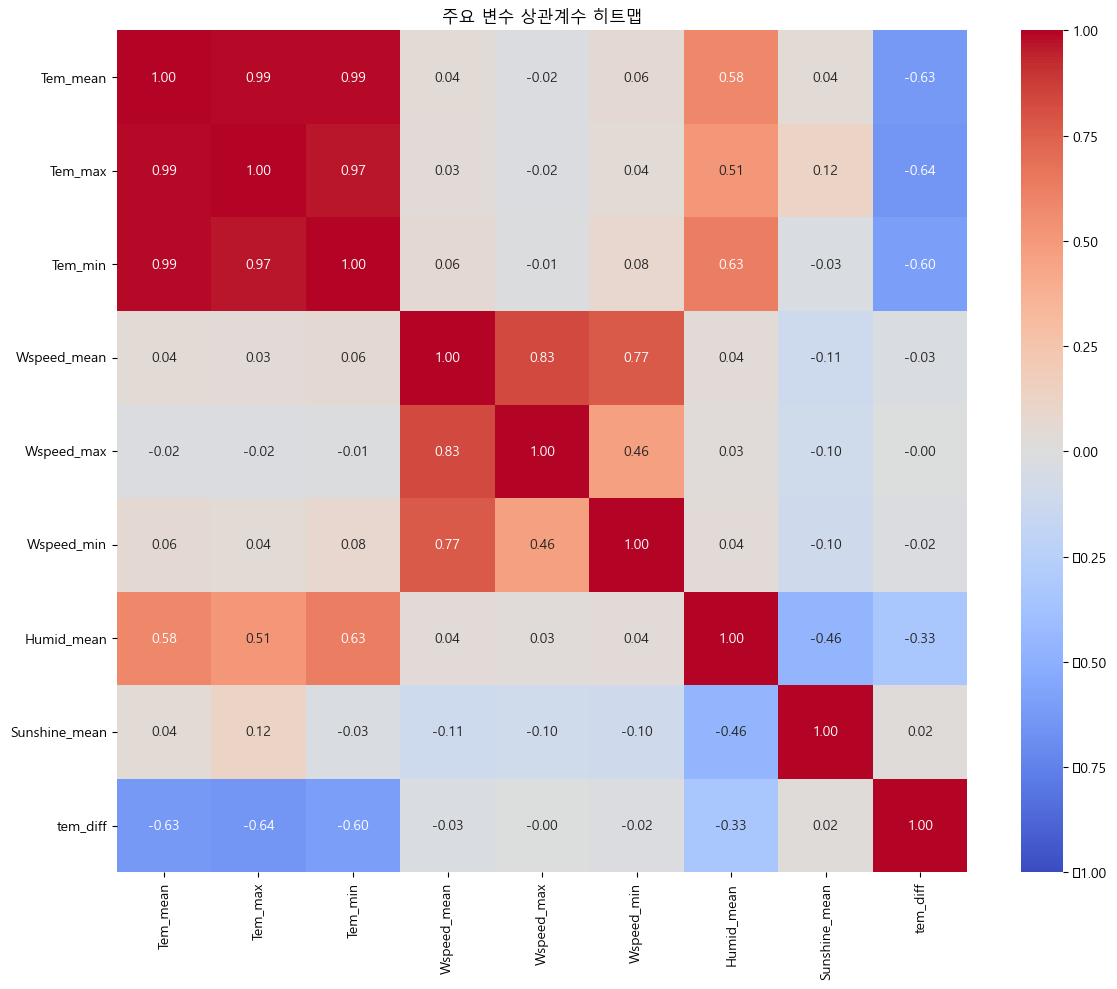


P-value 행렬:


,Tem_mean,Tem_max,Tem_min,Wspeed_mean,Wspeed_max,Wspeed_min,Humid_mean,Sunshine_mean,tem_diff
Tem_mean,0.0000,0.0000,0.0000,0.0276,0.4283,0.0020,0.0000,0.0474,0.0000
Tem_max,0.0000,0.0000,0.0000,0.1016,0.3475,0.0268,0.0000,0.0000,0.0000
Tem_min,0.0000,0.0000,0.0000,0.0034,0.6718,0.0001,0.0000,0.1532,0.0000
Wspeed_mean,0.0276,0.1016,0.0034,0.0000,0.0000,0.0000,0.0614,0.0000,0.1473
Wspeed_max,0.4283,0.3475,0.6718,0.0000,0.0000,0.0000,0.1865,0.0000,0.9525
Wspeed_min,0.0020,0.0268,0.0001,0.0000,0.0000,0.0000,0.0615,0.0000,0.4117
Humid_mean,0.0000,0.0000,0.0000,0.0614,0.1865,0.0615,0.0000,0.0000,0.0000
Sunshine_mean,0.0474,0.0000,0.1532,0.0000,0.0000,0.0000,0.0000,0.0000,0.4307
tem_diff,0.0000,0.0000,0.0000,0.1473,0.9525,0.4117,0.0000,0.4307,0.0000


In [ ]:
from scipy.stats import pearsonr

plt.rcParams['font.family'] = 'Malgun Gothic'

corr_cols = ['Tem_mean', 'Tem_max', 'Tem_min', 'Wspeed_mean', 'Wspeed_max',
       'Wspeed_min', 'Humid_mean','Sunshine_mean', 'tem_diff']

def corr_pval(df, cols):
    corr_matrix = pd.DataFrame(index=cols, columns=cols)
    pval_matrix = pd.DataFrame(index=cols, columns=cols)

    for i in cols:
        for j in cols:
            corr, pval = pearsonr(df[i], df[j])
            corr_matrix.loc[i, j] = corr
            pval_matrix.loc[i, j] = pval

    return corr_matrix.astype(float), pval_matrix.astype(float)

corr_df, pval_df = corr_pval(data, corr_cols)

plt.figure(figsize=(12,10))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("주요 변수 상관계수 히트맵")
plt.tight_layout()
plt.show()

print("\nP-value 행렬:")
pval_df.round(4)


c:\Users\hansung\.conda\envs\berta\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\hansung\.conda\envs\berta\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


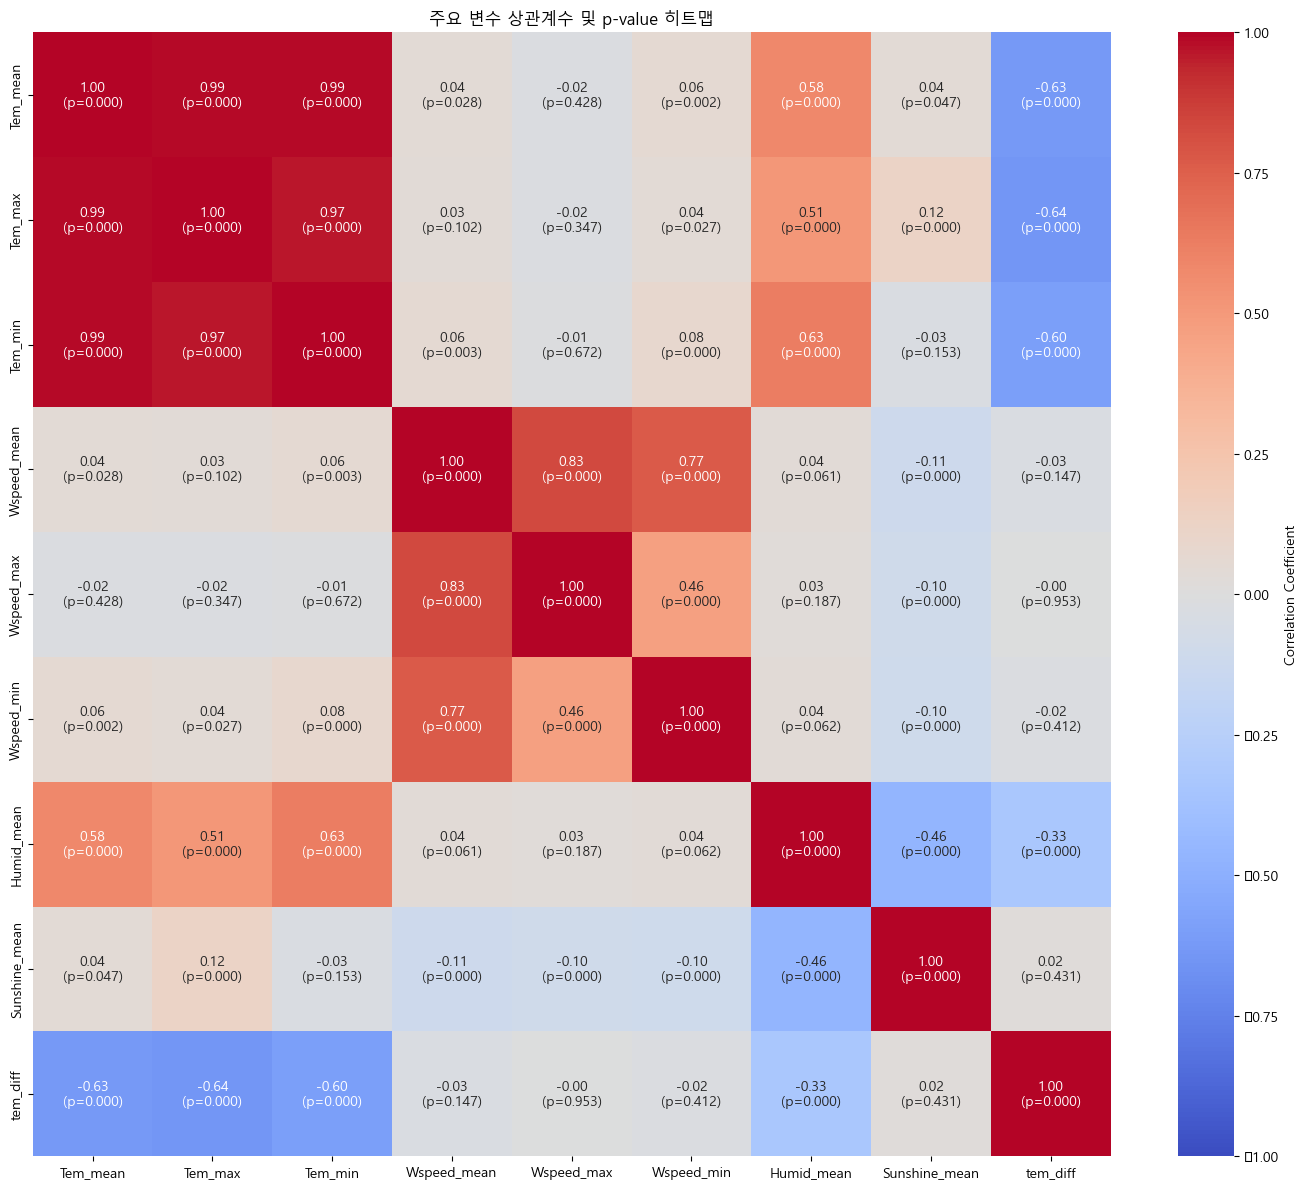

In [ ]:
import numpy as np

annot = corr_df.copy().astype(str)
for i in corr_df.index:
    for j in corr_df.columns:
        annot.loc[i, j] = f"{corr_df.loc[i, j]:.2f}\n(p={pval_df.loc[i, j]:.3f})"

plt.figure(figsize=(14,12))
sns.heatmap(corr_df, annot=annot, fmt="", cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("주요 변수 상관계수 및 p-value 히트맵")
plt.tight_layout()
plt.show()

In [31]:
data = data.drop(columns=['Tem_max','Tem_min','Season','Wspeed_max','Wspeed_min'])

In [32]:
data = data[(data['Date'].dt.month>=4)&(data['Date'].dt.month<=10)]

In [33]:
data.head()

,Date,Tem_mean,Wspeed_mean,Humid_mean,Sunshine_mean,tem_diff
5569,2015-04-01,15.1,2.2,97.5,0.0,6.3
5570,2015-04-02,15.6,3.5,96.0,0.0,3.9
5571,2015-04-03,15.0,2.5,93.1,0.7,5.2
5572,2015-04-04,14.3,3.4,91.6,0.0,6.6
5573,2015-04-05,14.0,1.9,94.8,3.3,5.5


In [34]:
data.to_csv('weather.csv',encoding='utf-8-sig',index=False)

## 감귤

In [35]:
df = pd.read_csv("제주특별자치도 서귀포시 감귤 생산 정보_20240513.csv",encoding="cp949")

In [36]:
df.columns

Index(['연도', '읍면동', '구분', '노지온주(극조생)', '노지온주(조생)', '노지온주(보통)', '하우스감귤(조기출하)',
       '비가림(월동)감귤', '만감류(시설)', '만감류(노지)', '데이터기준일'],
      dtype='object')

In [37]:
df = df.drop(columns=['노지온주(극조생)', '노지온주(보통)', '하우스감귤(조기출하)',
       '비가림(월동)감귤', '만감류(시설)', '만감류(노지)', '데이터기준일'])

In [38]:
df = df[(df['연도']>=2015) & (df['연도']<=2021)]
df

,연도,읍면동,구분,노지온주(조생)
135,2015,대정읍,농가수,0.0
136,2015,대정읍,면적,492.7
137,2015,대정읍,생산량,12275.0
138,2015,남원읍,농가수,3576.0
139,2015,남원읍,면적,3301.5
...,...,...,...,...
445,2021,중문동,면적,531.9
446,2021,중문동,생산량,21284.8
447,2021,예래동,농가수,530.4
448,2021,예래동,면적,334.1


In [39]:
df = df[df['구분']=='생산량']

In [40]:
df = (
    df[df['구분']=='생산량']
    .groupby('연도', as_index=False)['노지온주(조생)']
    .mean()
)


In [41]:
df.to_csv("label.csv", index=False, encoding='utf-8-sig')